In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import time
import seaborn as sns
import gc
import sys

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Step 1: Load 1970-2015 

## load data from NCAR-CESM2 CMIP6

In [3]:
path = "/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/day/tas/gn/files/d20190308/tas_day_CESM2_historical_r1i1p1f1_gn_"

In [4]:
ds = []

for start_year in [1970,1980,1990,2000]:
    #start_year = 1980
    end_year = start_year+9

    s_s_year = str(start_year)
    s_e_year = str(end_year)
    
    print(path+s_s_year+"0101-"+s_e_year+"1231.nc")
    temp_ds = xr.open_dataset(path+s_s_year+"0101-"+s_e_year+"1231.nc")
    ds.append(temp_ds)
    del temp_ds
    gc.collect()
    
print(path+"20100101-20150101.nc")
temp_ds = xr.open_dataset(path+"20100101-20150101.nc")
ds.append(temp_ds)
del temp_ds
gc.collect()

/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/day/tas/gn/files/d20190308/tas_day_CESM2_historical_r1i1p1f1_gn_19700101-19791231.nc


/gpfs/fs1/work/zhonghua/personal_clone_name/lib/python3.6/site-packages/xarray/conventions.py:394: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/day/tas/gn/files/d20190308/tas_day_CESM2_historical_r1i1p1f1_gn_19800101-19891231.nc
/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/day/tas/gn/files/d20190308/tas_day_CESM2_historical_r1i1p1f1_gn_19900101-19991231.nc
/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/day/tas/gn/files/d20190308/tas_day_CESM2_historical_r1i1p1f1_gn_20000101-20091231.nc
/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/day/tas/gn/files/d20190308/tas_day_CESM2_historical_r1i1p1f1_gn_20100101-20150101.nc


0

## Merge the dataset as xarray

In [5]:
start_time = time.time()
ds_merge = xr.merge(ds)
del ds
gc.collect()
elapsed_time = time.time() - start_time
print("It takes elapsed_time", elapsed_time, "to merge the data")

It takes elapsed_time 107.85815644264221 to merge the data


In [6]:
ds_merge

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 16426)
Coordinates:
  * time       (time) object 1970-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 247.65555 247.65555 ... 249.9253
    time_bnds  (time, nbnd) object 1969-12-31 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, nbnd) float32 -90.0 -89.52879 -89.52879 ... 89.52879 90.0
    lon_bnds   (lon, nbnd) float32 -0.625 0.625 0.625 ... 358.125 359.375

# Step 2: Maximal temperature

In [7]:
ds_merge_no_lon_max=ds_merge["tas"].max(dim="lon")
ds_merge_no_lon_max

<xarray.DataArray 'tas' (time: 16426, lat: 192)>
array([[247.65555, 248.82619, 250.48547, ..., 246.31497, 246.02081, 244.7886 ],
       [248.33836, 251.10933, 252.55414, ..., 248.8427 , 247.06508, 244.20967],
       [247.60329, 249.3981 , 249.55374, ..., 244.05511, 243.12135, 241.93633],
       ...,
       [247.22163, 248.14699, 249.79579, ..., 254.03195, 253.32416, 252.09598],
       [247.1145 , 248.0017 , 249.38503, ..., 251.5872 , 250.82758, 250.00345],
       [246.41954, 247.45654, 249.4631 , ..., 252.22267, 251.04239, 250.08524]],
      dtype=float32)
Coordinates:
  * time     (time) object 1970-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [8]:
ds_merge_max_datetime = ds_merge_no_lon_max.assign_coords(time = ds_merge_no_lon_max.indexes['time'].to_datetimeindex())
ds_merge_max_datetime

/gpfs/fs1/work/zhonghua/personal_clone_name/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """Entry point for launching an IPython kernel.


<xarray.DataArray 'tas' (time: 16426, lat: 192)>
array([[247.65555, 248.82619, 250.48547, ..., 246.31497, 246.02081, 244.7886 ],
       [248.33836, 251.10933, 252.55414, ..., 248.8427 , 247.06508, 244.20967],
       [247.60329, 249.3981 , 249.55374, ..., 244.05511, 243.12135, 241.93633],
       ...,
       [247.22163, 248.14699, 249.79579, ..., 254.03195, 253.32416, 252.09598],
       [247.1145 , 248.0017 , 249.38503, ..., 251.5872 , 250.82758, 250.00345],
       [246.41954, 247.45654, 249.4631 , ..., 252.22267, 251.04239, 250.08524]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2015-01-01
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [9]:
df_max = ds_merge_max_datetime.to_dataframe()
df_max.shape

(3153792, 1)

# Step 3: Min temperature

In [10]:
ds_merge_no_lon_min=ds_merge["tas"].min(dim="lon")
ds_merge_no_lon_min

<xarray.DataArray 'tas' (time: 16426, lat: 192)>
array([[246.88742, 245.25671, 244.3886 , ..., 241.46837, 242.82104, 243.87688],
       [247.55919, 245.82375, 245.3586 , ..., 237.97673, 240.5518 , 242.44164],
       [246.87755, 243.82233, 242.97469, ..., 237.64062, 239.59964, 241.09288],
       ...,
       [246.53964, 245.67099, 244.89386, ..., 247.57915, 249.27428, 250.94757],
       [246.43192, 245.51381, 245.12979, ..., 248.80948, 248.76433, 249.32912],
       [245.72887, 244.66446, 244.43816, ..., 248.65611, 249.42761, 249.75647]],
      dtype=float32)
Coordinates:
  * time     (time) object 1970-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [11]:
ds_merge_min_datetime = ds_merge_no_lon_min.assign_coords(time = ds_merge_no_lon_min.indexes['time'].to_datetimeindex())
ds_merge_min_datetime

/gpfs/fs1/work/zhonghua/personal_clone_name/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """Entry point for launching an IPython kernel.


<xarray.DataArray 'tas' (time: 16426, lat: 192)>
array([[246.88742, 245.25671, 244.3886 , ..., 241.46837, 242.82104, 243.87688],
       [247.55919, 245.82375, 245.3586 , ..., 237.97673, 240.5518 , 242.44164],
       [246.87755, 243.82233, 242.97469, ..., 237.64062, 239.59964, 241.09288],
       ...,
       [246.53964, 245.67099, 244.89386, ..., 247.57915, 249.27428, 250.94757],
       [246.43192, 245.51381, 245.12979, ..., 248.80948, 248.76433, 249.32912],
       [245.72887, 244.66446, 244.43816, ..., 248.65611, 249.42761, 249.75647]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2015-01-01
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [12]:
df_min = ds_merge_min_datetime.to_dataframe()
df_min.shape

(3153792, 1)

# Step 4: Merge Max and Min

## merge dataframe and reset index

In [13]:
df_max["max"] = df_max["tas"]
df_min["min"] = df_min["tas"]
df_max_min = pd.concat([df_max, df_min],axis=1)
df_max_min=df_max_min[["max","min"]]
df_max_min.head()

max         min
time       lat                               
1970-01-01 -90.000000  247.655548  246.887421
           -89.057592  248.826187  245.256714
           -88.115183  250.485474  244.388596
           -87.172775  253.186768  242.546600
           -86.230366  259.596008  242.068161

In [14]:
df_max_min_reset=df_max_min.reset_index()
df_max_min_reset.head()

,time,lat,max,min
0,1970-01-01,-90.000000,247.655548,246.887421
1,1970-01-01,-89.057592,248.826187,245.256714
2,1970-01-01,-88.115183,250.485474,244.388596
3,1970-01-01,-87.172775,253.186768,242.546600
4,1970-01-01,-86.230366,259.596008,242.068161


## set up day of year

In [15]:
df_max_min_reset["DOY"] = df_max_min_reset["time"].dt.dayofyear
df_max_min_reset.head()

,time,lat,max,min,DOY
0,1970-01-01,-90.000000,247.655548,246.887421,1
1,1970-01-01,-89.057592,248.826187,245.256714,1
2,1970-01-01,-88.115183,250.485474,244.388596,1
3,1970-01-01,-87.172775,253.186768,242.546600,1
4,1970-01-01,-86.230366,259.596008,242.068161,1


## reduce to maximal and minimal tempeature based on latitude and DOY

In [16]:
max_temp = df_max_min_reset.groupby(["lat","DOY"])["max"].max()
min_temp = df_max_min_reset.groupby(["lat","DOY"])["min"].min()
df_temp_final = pd.concat([max_temp,min_temp],axis=1)
df_temp_final.head()

max         min
lat   DOY                        
-90.0 1    254.971603  241.510956
      2    253.439301  241.116074
      3    254.066315  241.438477
      4    257.923920  240.757050
      5    254.266022  240.425613

In [17]:
df_temp_final_reset_final = df_temp_final.reset_index().set_index("lat")
df_temp_final_reset_final.head()

,DOY,max,min
lat,,,
-90.0,1,254.971603,241.510956
-90.0,2,253.439301,241.116074
-90.0,3,254.066315,241.438477
-90.0,4,257.923920,240.757050
-90.0,5,254.266022,240.425613


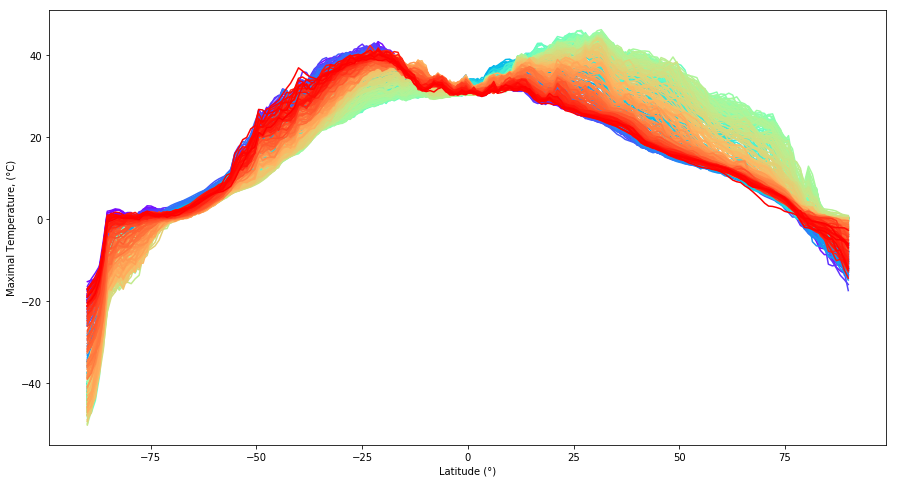

In [19]:
from matplotlib.pyplot import cm
plt.figure(figsize=(15,8))
color=iter(cm.rainbow(np.linspace(0,1,366)))
for i in range(1,367):
    c=next(color)
    (df_temp_final_reset_final[df_temp_final_reset_final["DOY"]==i]["max"]-273.15).plot(label=str(i), c=c)
#plt.legend(loc="upper left",title="DOY")

plt.xlabel('Latitude (°)')
plt.ylabel('Maximal Temperature, (°C)')
plt.show()

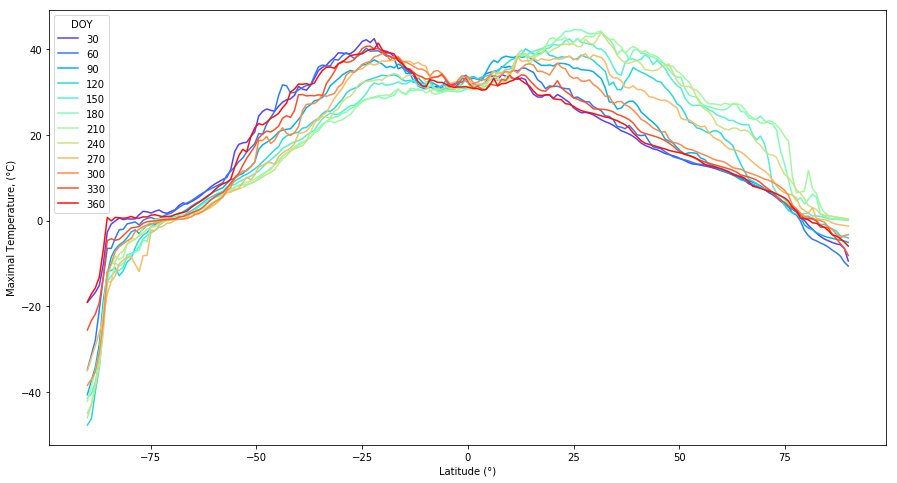

In [18]:
from matplotlib.pyplot import cm
plt.figure(figsize=(15,8))
color=iter(cm.rainbow(np.linspace(0,1,366)))
for i in range(1,367):
    c=next(color)
    if i %30 == 0:
        (df_temp_final_reset_final[df_temp_final_reset_final["DOY"]==i]["max"]-273.15).plot(label=str(i), c=c)
plt.legend(loc="upper left",title="DOY")
#plt.colorbar(color)
plt.xlabel('Latitude (°)')
plt.ylabel('Maximal Temperature, (°C)')
plt.show()

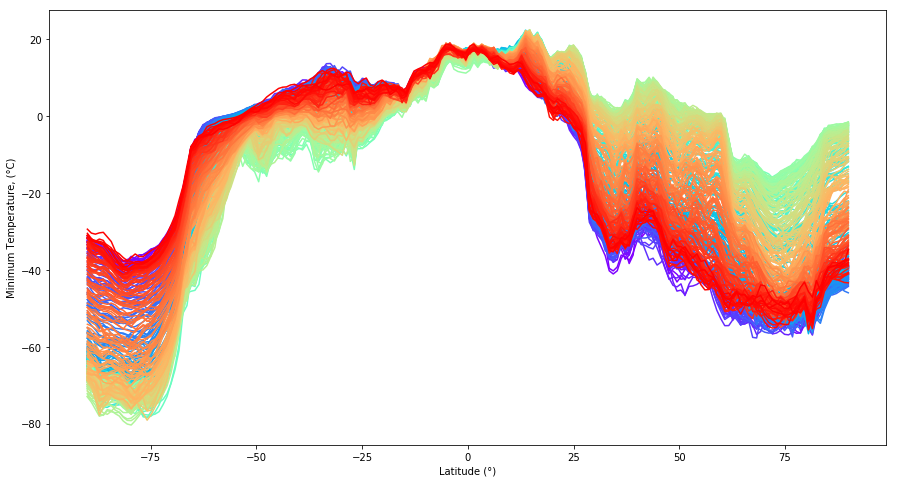

In [20]:
from matplotlib.pyplot import cm
plt.figure(figsize=(15,8))
color=iter(cm.rainbow(np.linspace(0,1,366)))
for i in range(1,367):
    c=next(color)
    (df_temp_final_reset_final[df_temp_final_reset_final["DOY"]==i]["min"]-273.15).plot(label=str(i), c=c)
#plt.legend(loc="upper left",title="DOY")

plt.xlabel('Latitude (°)')
plt.ylabel('Minimum Temperature, (°C)')
plt.show()

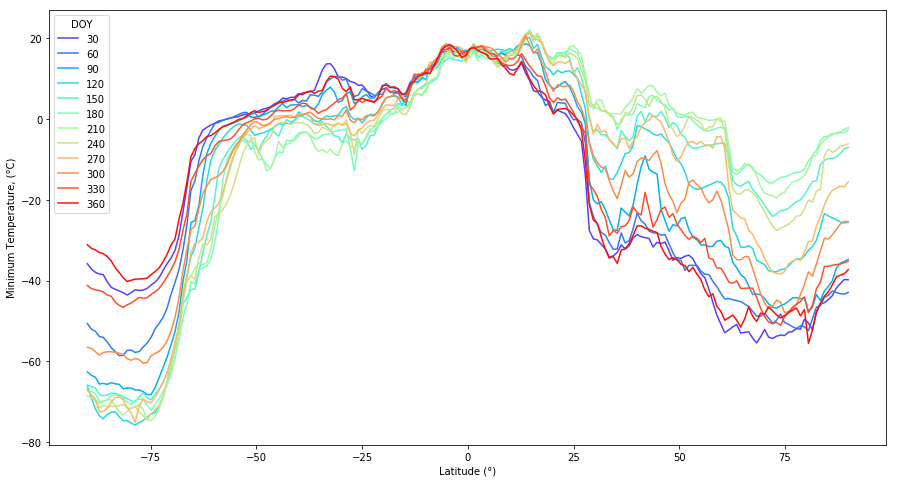

In [21]:
from matplotlib.pyplot import cm
plt.figure(figsize=(15,8))
color=iter(cm.rainbow(np.linspace(0,1,366)))
for i in range(1,367):
    c=next(color)
    if i %30 ==0:
        (df_temp_final_reset_final[df_temp_final_reset_final["DOY"]==i]["min"]-273.15).plot(label=str(i), c=c)
plt.legend(loc="upper left",title="DOY")
plt.xlabel('Latitude (°)')
plt.ylabel('Minimum Temperature, (°C)')
plt.show()

In [34]:
df_temp_final_reset_final.to_pickle('/glade/scratch/zhonghua/lat-temp-CESM/temp_max_min.pkl')

In [22]:
df = pd.read_pickle('/glade/scratch/zhonghua/lat-temp-CESM/temp_max_min.pkl')
df.head()

,DOY,max,min
lat,,,
-90.0,1,254.971603,241.510956
-90.0,2,253.439301,241.116074
-90.0,3,254.066315,241.438477
-90.0,4,257.923920,240.757050
-90.0,5,254.266022,240.425613


In [23]:
def DOY_lat_temp(DOY, latitude, df): 
    df_DOY = df.loc[df["DOY"]==DOY]
    near_lat = find_nearest(np.asarray(list(set(df_DOY.index))),latitude)
    max_temp = df_DOY.loc[near_lat]["max"]
    min_temp = df_DOY.loc[near_lat]["min"]
    print("DOY is:", DOY)
    print("Latitude is:", latitude)
    print("nearest latitude is:",near_lat)
    print("max temp is:", max_temp)
    print("min temp is:", min_temp)
    return max_temp, min_temp

In [24]:
max_temp, min_temp = DOY_lat_temp(222, 30, df)
print(max_temp)
print(min_temp)

DOY is: 222
Latitude is: 30
nearest latitude is: 29.685863874345543
max temp is: 316.6026306152344
min temp is: 276.7599182128906
316.6026306152344
276.7599182128906
